<a href="https://colab.research.google.com/github/russburns/Laframboise1966Code/blob/main/MAIN_PROGRAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Code

In [ ]:
import numpy as np
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
def coeft(x):
    result = (np.sqrt(np.pi) / 2) * special.erfcx(x) ##special function for exp(x**2) * erfc(x)
    return result

#Fortran II Code and Documentation

Subprograms relevant to spherical probes--UNO, DUO, TRE, SDFN, POWERS, CHASPH-are excluded.

##MAIN PROGRAM 2

In [ ]:
C       MAIN PROGRAM 2
C       PROBE CHARACTERISTIC - REPELLED PARTICLES AT ZERO TEMPERATURE
        DIMENSION YYY(10)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET,HALT

C       PTEE = NONDIMENSIONAL PROBE POTENTIAL FOR ATTRACTED PARTICLES
C       PROBYE = PROBE RADIS / DEBYE LENGTH OF ATTRACTED SPECIES
C       SHERAD = INITIAL VALUE OF SHEATH EDGE RAUIUS / PROBE RADIUS
C           IF SHERAD + VE, SHEDGE = SHERAD
C           IF SHERAD = 0, REUSE SHEDGE FROM PREVIOUS CASE
C           IF SHREAD -VE, GENERATE SHEDGE FROM CHILD-LANGMUIR RELATION
C       QT1 AND QT2 ARE COEFFICIENTS OF DEBYE TERM AND FAR FIELD TERM
C           IN MIXING FUNCTION

C       KT1 SPECIES AMOUNT OF OUTPUT FOR EACH INTERATION EXCEPT LAST
C       KT2 SPECIES AMOUNT OF OUTPUT FOR LAST ITERATIION
C       INITIA SPECIFIES WHERE INITIAL CHARGE DENSITY FUNCTION (ETA)
C           IS THAT FOR A CHILD-LANGMUIR SHEATH OR WHETHER PREVIOUS ETA
C           IS RE-USED
C           INITIA = 1 - CHILD-LANGMUIR SHEATH ASSUMED
C           INITIA = 2 - CHILD-LANGMUIR SHEATH ASSUMED TO BEGIN FIRST
C                        ITERATION. PREVIOUS ETA RE-USED WHEN SHEATH EDGE
C                        RADIUS IS RESET
C           INITIA = 3 - PREVIOUS ETA RE-USED
C       M IS NUMBER OF POINTS IN COMPUTATION NET
C       NDUB IS ITERATION AT WHICH DENSITY OF POINTS IN COMPUTATION NET
C           IS DOUBLED
C       NEND IS MAXIMUM NUMBER OF ITERATIONS
C       NPRINT - OUTPUT WILL OCCUR AT EVERY NPRINT.TH NET POINT
C       MODE SPECIFIES WHETHER COMPUTATION IS FOR SPHERICAL OR CYLINDRICAL
C           PROBE
C       MCD SPECIFIES PARTICLE DISBTRIBUTION FUNCTIONS

        KASE = 1
    3   READ INPUT TAPE 5, 4,PTEE, PROBYE,SHERAD,QT1M, QT2M
    4   FORMAT(1P3E10.3,OP2F10.7)
        READ INPUT TAPE 5,5,KT1,KT2,INITIA,M.NDUB,NEND,NPRINT,MODE,MCD
    5   FORMAT(1415)

        IF(INITIA-2)165,165,166
    166 IF(SENSE LIGHT 1)167,165
    167 IF(SENSE LIGHT 2)168,165
    168 SENSE LIGHT 1
        SENSE LIGHT 2
        GO TO 3

    165 KT1=KT1
        KT2=KT2
    222 PRINT 220,KASE
    220 FORMAT(12H0 BEGIN CASE I5)
    221 KASE = KASE_1
        IF(QTIM)321,321,320
    320 QT1=QT1M
        QT2=QT2M
    321 IF (SHERAD)400,401,402

    400 SHEDGE =1.0+1.212*(PTEE**0.75)/PROBYE
        GO TO 401

    402 SHEDGE=SHERAD
        GO TO 401

    401 GO TO (6,270),MODE
    6   WRITE OUTPUT TAPE 6,7
    7   FORMAT ( 73H1 SPHERICAL PROBE CHARACTERISTIC - REPELLED PARTICLES
    1   AT ZERO TEMPERATURE)
        GO TO 9
    270 WRITE OUTPUT TAPE 6,271
    271 FORMAT(75H1 CYLINDRICAL PROBE CHARACTERISTIC - REPELLED PARTICLES
    1   AT ZERO TEMPERATURE)
    9   WRITE OUTPUT TAPE 6,10,PTEE,PROBYE,SHEDGE,QT1,QT2
    10  FORMAT(7X4HPTEE,4X6HPROBYE,4X6HSHEDGE,7X3HQT1,7X3HQT2/
    1   1X1P3E10.3,OP2F10.7)
    81  WRITE OUTPUT TAPE 6,8,KT1,KT2,INITIA,M,NDUB,NEND,NPRINT,MODE,MCD
    8   FORMAT(47H  KT1 KT2 INITIA  M   NDUB NEND NPRINT MODE MCD /1X14I5)

        TIME = CLOCK(0.0)

    101 PI = 3.1415927
        SQTPI = 1.7724539
        VIPI = 1.0/SQTPI
        MAD = 1
        MEW = 0
        KUTY = 1
        GAMMA=PROBYE**2
        PI6=1.0
        PTEE=-ABSF(PTEE)
        PI3=PTEEKBD=1
        MZET=2
        IF(INITIA-2)15,15,112

    112 N=MP-1
        NP=MP
        FACT=GAMOLD/GAMMA*PTEE/PTOLD
        DO 90 I=1,NP
    90  ETA(I)=ETA(I)*FACT
    336 IF(N-M)17,15,19
    17  M=N2
        WRITE OUTPUT TAPE 6,22,M
    22  FORMAT(4H M=I5)
        GO TO 15
    19  L=N/M
        MP=M+1
        DO 21 I=2,MP
        J=(I-1)*L+1
    21  ETA(I)=ETA(J)
        GO TO 15

    15  SENSE LIGHT 0
        SENSE LIGHT 1
        KEND=0
        GAMOLD=GAMMA
        PTOLD=PTEE
        KSET=1

    16  FLM=M

        DELTS=1.0/FLM
        MP=M+1
        YZP=0.125

    253 DO 18 I=1,MP
        FIE=I-1
        S(I)=DELTS*FIE
        ROP(I)=SHEDGE-(SHEDGE-1.0)*(YZP*(1.0-S(I))+(1.-YZP)*(1.0-S(I))**2)
        X(I)=1.0/ROP(I)
        XSQ(I)=X(I)**2
        DXDS(I)=-XSQ(I)*(SHEDGE-1.0)*(YZP+2.0*(1.0-S(I))*(1.0-YZP))
        SCOT(I)=SQRTF(1.0-XSQ(I))
    18  COOK(I)=COOKIE()
        GO TO (20,23,20),KSET
    20  IF(2*INITIA+KSET-5)207,207,294

    207 DO 210=1,MP
        XI(I)=PTEE*((SHEDGE-1.0/X(I))/(SHEDGE-1.0))**1.3333333
    210 ETA(I)=0.5/SQRTF(1.0-2.0*XI(I))
        GO TO 294

    294 GO TO (370,370,228),KSET
    370 GO TO (26,280),MODE

C       COMPUTE POTENTIAL XI(1-MP) AND ITS GRADIENT DX1DS(1-MP) USING
C       CHARGE DENSITY ETA(1-MP)

    26  DO 33 I=1,MP
    33  Y(I)=-GAMMA*ETA(I)/(XSQ(I)**2)*DXDS(I)
        Z(I)=0.0
        KINK-1
        GO TO 34

    36  DO 38 I=1,MP
        DXIDS(I)=Z(I)*DXDS(I)
    38  Y(I)=DXIDS(I)
        Z(I)=PI3
        KINK=2
        GO TO 34

    280 DO 281 I=1,MP
    281 Y(I)=-DXDS(1)*GAMMA*ETA(I)/(X(I)*XSQ(I))
        Z(I)=0.0
        KINK=3
        GO TO 3

    282 DO 284 I=1,MP
        DXIDS(I)=Z(I)*DXDS(I)/X(I)
    284 Y(I)=DXIDS(I)
        Z(I)=PI3
        KINK=4
        GO TO 34

    34  Z(2)=Z(1)+(5.0*Y(1)+8.0*Y(2)-Y(3))*DELTS/12.0
        DO 35   I=3,M
    35  Z(I)=Z(I-1)+(13.0*(Y(I-1)+Y(I))-Y(I-2)-Y(I+1))*DELTS/24.0
        Z(MP)=Z(M)+(5.0*Y(MP)+8.0*Y(M)-Y(M-1))*DELTS/12.0
        GO TO (36,325,282,330),KINK

    325 EDGE=Z(MP)/(1.0-X(MP))
    327 DO 39 I=1,MP
        DXIDS(I)=DXIDS(I)+EDGE*DXDS(I)

    39  XI(I)=Z(I)+EDGE*(X(I)-1.0)
        GO TO (199,340,340),MCD

    330 EDGE=-Z(MP)/LOGF(X(MP))
    332 DO 285  I=1,MP
        DXIDS(I)=DXIDS(I)+EDGE*DXDS(I)/X(I)
    285 XI(I)=Z(I)+EDGE*LOGF(X(I))
        GO TO (199,340,340),MCD

C       COMPUTE NEW CHARGE DENSITY ETAPS(1-MP)

    199 CALL CHARGE
        GO TO 341

    340 CALL CHAMON
        GP TO 341

    341 IF(SENSE LIGHT 1)161,160
    161 IF(SENSE LIGHT 2)162,160
    162 SENSE LIGHT 1
        SENSE LIGHT 2
        GO TO 318

    160 KEND=KEND+1
        KT1=KT1
        GO TO (41,300,71,71),KT1

    300 MYK = 10
        LYM=1
    303 KYT=XMODF(KEND,MYK)
        IF(KYT)315,316,315
    316 KYT=1-
    315 YYY(KYT)=YPOS

    306 IF(KYT-MYK)310,307,310
    307 WRITE OUTPUT TAPE 6,302,KEND,(YYY(I),I=1,MYK)
    302 FORMAT(5H, KENDI4,3H Y=10F10.4)
    310 GO TO (41,311),LYM

    71  WRITE OUTPUT TAPE 6,45,YPOS
    45  FORMAT(3H, Y=1PE14.7)
    70  GO TO (41,41,41,42),KT1
    42  WRITE OUTPUT TAPE 6,43,(I,ROP(I),ETA(I),XI(I),ETAPS(I)),
    1   I=1,MP,NPRINT)
    43  FORMAT(2(7X1HI,3X7HR(I)/RP,11X3HETA,12X2HXI,7X7HETA NEW)/
    1   (2(4XI4,0PF10.5,1P3E14.7)))

    41  DO 40 I=1,MP
        ETANG(I)=0.0
    40  ETA(I)=(1.0-COOK(I))*ETA(I)+ETAPS(I)*COOK(I)

        PTERR=(X(MP)-XSQ(MP))*DXIDS(MP)/DXDS(MP)
        NHALT=NEND
        CALL ADJUST (NHALT,MAD,MEW,QT1,QT2,3,0.35,PTERR,PTINY)

        IF (NHALT-KEND-8)228,380,228
    380 IF(KEND-(KEND/10)*10)228,371,228
    371 ERROR=PTINY/PTEE
        IF(ABSF(ERROR)-0.0002)366,345,345

C       SHEATH EDGE POTENTIAL GRADIENT IS SMALL ENOUGH. END EXECUTION

    366 NEND=XMIN0F(KEND+8,NEND)
        WRITE OUTPUT TAPE 6,363,ERROR
        GO TO 228

C       USE CURRENT VALUE OF SHEATH EDGE POTENTIA GRADIENT TO RESET
C           SHEATH EDGE RADIUS
    345 ERDD=ERDD
        SHDD=SHDD
        ERD=ERROR
        SHD=SHEDGE
        KUTY=KUTY+1
        IF(KUTY-3)385,386,386
    386 SHEDGE=SHD-ERD*(SHD-SHDD)/(ERD-ERDD)
        IF(SHEDGE-1.0)350,350,360

    385 IF(DXIDS(MP))351,350,352

    352 DXI=-XSQ(MP)*DXIDS(MP)/DXDS(MP)
        D2XI=-ETA(MP)*GAMMA
        IF(D2XI)349,350,350

    350 WRITE OUTPUT TAPE 6,369,KUTY,ERDD,ERD,SHDD,SHD,SHEDGE
    369 FORMAT (29H TROUBLE IN SHEATH EDGE RESET 14,1P5E12.5)
        WRITE OUTPUT TAPE 6,43,(I,ROP(I),ETA(I),XI(I),ETAPS(I),I=1,MP)
        SENSE LIGHT 1
        SENSE LIGHT 2
        GO TO 318

    349 SHEDGE=SHEDGE-DXI/D2XI
        GO TO 360

    351 DO 353 L=1,M
        I=MP-L
        IF(DXIDS(I+1))354,354,350
    354 IF(DXIDS(I))353,353,355
    353 CONTINUE
        GO TO 350
    355 X(MP)=X(I)+(X(1+I)-X(I))/(-DXIDS(I+1)+DXIDS(I))*DXIDS(I)
        SHEDGE=1.0/X(MP)
        GO TO 360

    360 GO TO (361,362,362,362),KT1
    362 WRITE OUTPUT TABLE 6,363,ERROR,SHEDGE
    363 FORMAT(50H RELATIVE ERROR IN SHEATH EDGE POTENTIAL GRADIENT F11.6,
    1   24H NEW SHEATH EDGE RADIUS 1PE10.3)
    361 KSET=3
        GO TO 16

    228 IF(NEND-KEND01)46,47,46
    47  GO TO (311,312,311,311),KT1
    312 MYK=XMODF(KEND,10)
        IF(MYK)311,311,313
    313 LYM=2
        GO TO 306

    311 KT1=KT2
    46  IF(NEND-KEND)318,318,48
    48  IF(NDUB-KEND)50,51,50

    318 TOTAL=CLOCK(TIME)/100.0
        WRITE OUTPUT TAPE 6,319,TOTAL
    319 FORMAT(29H0 EXECUTION TIME IN MINUTES F7.2)
        GO TO 3

C       DOUBLE NUMBER OF POINTS IN COMPUTATION NET.

    51  IF(400-2*M)54,58,58
    58  DO 52 I=1,MP
        K=2*(MP-I)+1
        L=MP-I+1
    52  ETA(K)-ETA(L)
        M=2*M
        NPRINT=2*NPRINT
        KSET=2
        GO TO 16

    23  DO 53 I=5,MP,4
        ETA(I-3)=(3.0*ETA(I-4)+6.0*ETA(I-2)-ETA(I))/8.0
    53  ETA(I-1)=(-ETA(I-4)+6.0*ETA(I-2)+3.0*ETA(I))/8.0
    54  WRITE OUTPUT TAPE 6,57,M
    57  FORMAT(2X2HM=I8)

C       RESET SENSE LIGHTS.

    50  LITE=XMODF(KEND,4)+1
        SENSE LIGHT 0
        GO TO (61,62,63,64), LITE
    61  SENSE LIGHT 1
        GO TO (26,280),MODE
    62  SENSE LIGHT 2
        GO TO (26,280),MODE
    63  SENSE LIGHT 3
        GO TO (26,280),MODE
    64  SENSE LIGHT 4
        GO TO (26,280),MODE
        END

##ADJUST


In [ ]:
        SUBROUTINE ADJUST(NEND,MAD,MEW,QT1,QT2,KWIT, ACCY, YUSE,YINY)
C       SUBROUTINE ADJUST MONITORS CONVERGENCE OF THE CALCULATIONS AND
C           TAKES CORRECTIVE ACTION WHEN NECESSARY

C       IF KWIT=1 ADJUST TAKES NO ACTION
C       IF KWIT=2 ADJUST DAMPS ANY DIVERGENT OSCILLATIONS
C       IF KTWIT = 3 ADJUST ALSO ENDS EXECUTION WHEN ACCURACY OF RESULTS
C           IS SUFFICIENT

        DIMENSION YCHEK(10),DCHEK(10),ZCHEK(10)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET,HALT

        IF(KWIT-1)228,228,21

C       IF KCHEK = 1 TO 9, STORE YCHEK(KCHEK) AND RETURN.

    21  KCHEK=XMODF(KEND,10)
        IF(KCHEK)251,250,251
    250 KCHEK=10
    251 YCHKE(KCHEK)=YUSE
    232 IF(KCHEK-8)228,121,122
    121 A8=B8
        B8=C8
        C8=YCHEK(8)
        GO TO 228
    122 IF(KCHEK-10)124,234,228
    124 A9=B9
        B9=C9
        C9=YCHEK(9)
        GO TO 228
C       IF KCHECK = 10, STORE YCHEK(10) AND LOOK FOR OSCILLATIONS IN
C       YCHEK(1-10)

    234 A10=B10
        B10=C10
        C10=YCHEK(10)
        DO 235 I=2,10
    235 DCHEK(I)=YCHEK(I)-YCHEK(I-1)
        DO 236 I=2,9
        IF (DCHEK(I))237,237,238
    237 IF(DCHEK(I+1))123,236,236
    238 IF(DCHEK(I+1))236,236,123
    236 CONTINUE
        DO 240 I=2,9
    240 ZCHEK(I)=(ABSF(DCHEK(I))+ABSF(DCHEK(I+1)))/2.0
        SMCHEK=0.0
        DO 262 I=2,8
    262 SMCHEK=SMCHEK+ZCHEK(I+1)/ZCHEK(I)
        IF(SMCHEK-6.3)123,123,242
C       OSCILLATIONS HAVE BEEN OBSERVED. DECREASE MIXING AND RETURN.

    242 MEW=0
        MAD=2
    125 QT1=QT1*0.9
        QT2=QT2*0.9
        WRITE OUTPUT TAPE 6,127,KEND,QT1,QT2
    127 FORMAT(7H0, KEND=14,27H 0.9 DECREASE IN MIX. QT1=F10.7,5H QT2=
    1   F10.7)
    128 DO 247 I=1,MP
    247 COOK(I)=COOK(I)*0.9
        228

C       OSCILLATIONS FOUNO TO BE ABSENT OR DECREASING.

    123  IF(KWIT-2)228,228,132

    132 GO TO (280,281),MZET

    280 MEW=MEW+1
        IF(MEW-2)228,134,134

    281 YMIN=YCHEK(1)
        YMAX=YCHEK(1)
        DO 282 I=1,9
        YMIN=MIN1F(YMIN,YCHEK(I+1))
    282 YMAX=MAX1F(YMIN,YCHEK(I+1))
        IF(ABSF(2.0*(YMAX-YMIN)(YMAX+YMIN))-ACCY)283,283,228
    283 YINY=(C9+C10)/2.0
        GO TO 278

C       FIND OUT IF CONVERGENCE TOWARD AN ASYMPTOTIC RESULT IS YET
C       INDICATED. IF SO, GO TO 138

    134 RIO=(B10-C10)/(A10-B10)
        IF(RIO)228,228,137
    137 IF(RIO-1.0)138,228,228

C       ESTIMATE NUMBER OF ITERATIONS REMAINING BEFORE REQUIRED ACCURACY
C       IS ATTAINED. IF THIS EXCEEDS 40, GO TO 141. OTHERWISE, GO TO 140.

    138 YINY=A10-(A10-B10)/(1.0-RIO)
        ALPH=(C10-YINY)/(A10-YINY)
        FINS=20.0*(LOGF (ACCY*YINY/(C10-YINY))/LOGF(ALPH))
        KINS=FINS
        IF(KINS-40)140,140,141

C       CONVERGENCE IS TOO SLOW. IF MIXING FUNCTION HAS NOT ALREADY BEEN
C       DECREASED BECAUSE OF OSCILLATIONS, INCREASE IT.

    141 IF(KWIT-3)228,228,28
    28  GO TO (126,228),MAD

    126 FACT=1.111
        QTY=QT2*FACT
        QT2=MIN1F(QTY,0.7)
        FACT=FACT*QT2/QTY
        QTS=QT1
        ZIT=1.0-QT2
        ZAT=QT1*FACT
        QT1=MIN1F(ZIT,ZAT)
        MEW=0
        WRITE OUTPUT TAPE 6,142,KEND,QT1,QT2,C10,YINY
    142 FORMAT(4H0KND14,13H SLO CONV QT1F10.7,4H QT2F10.7,2H YIPE10.3,
    1   5H YINY1PE10.3)
    24  DO 143 I=1,MP
    143 COOK(I)=COOKIE(I,QT1,QT2)
        GO TO 228

    C   FIND OUT IF RESULT IS SUFFICIENTLY ACCURATE. IF SO, END EXECUTION
    C   IF NOT, GO TO 145.

    140 IJJ=1
        IF(ABSF(C10-YINY)-ABSF(ACCY*YINY))144,144,275
    144 IF(ABSF(C9-YINY)-ABSF(ACCY*YINY))146,146,275

    275 IJJ-2
    146 DO 266 I=1,MP
    266 Y(I)=(2.*(ETAPS(I)-ETANG(I)-ETA(I))/(ETAPS(I)-ETANG(I)+ETA(I)))**2
        TOT=0.0
        DO 267 I=1,M
    267 TOT=TOT+(Y(I+1)+Y(I))*(ROP(I+1)-ROP(I))*0.5
        AVGE=TOT/(ROP(MP)-1.0)
        IF(AVGE-0.0100)255,255,277

    277 IJJ=2
    255 GO TO (278,145),IJJ

    278 WRITE OUTPUT TAPE 6,147,KEND,YINY
    147 FORMAT(7H0 KEND=14,36H RESULT SUFFICIENTLY ACCURATE. YINY=1PE10.3)
    26  NEND=XMIN0F(KEND+8,NEND)
        GO TO 228

    145 GO TO (228,228,151,34),KWIT

C   FIND OUT IF THERE ARE OSCILLATIONS DECREASING TOO SLOWLY TO ALLOW
C   ATTAINMENT OF REQUIRED ACCURACY WITHIN 40 ITERATIONS.
C   IF SO, GO TO 159. IF NOT, GO TO 151.

    34  IF(A8-A9)148,148,149
    148 IF(A9-A10)151,151,150
    149 IF(A9-A10)150,150,151

    150 IF(B8-B9)152,152,153
    152 IF(B9-B10)151,151,154
    153 IF(B9-B10)154,154,151

    154 IF(C8-C9)155,155,156
    155 IF(C9-C10)151,151,157
    156 IF(C9-C10)157,157,151

    157 AMA=(ABSF(A8-A9)+ABSF(A9-A10))/2.0
        AMB=(ABSF(C8-C9)+ABSF(C9-C10))/2.0
        IF(AMB*(AMB/AMA)**2-ACCY*YINY)151,151,159

    151 WRITE OUTPUT TAPE 6,170,KEND,C10,YINY,KINS,AVGE
    170 FORMAY(7H0 KEND=14,3H Y=1PE10.3,6H YINY=1PE10.3,20H ESTD. CYCYLES T
    1   O END I3.6H AVGE=0PF8.4)
    270 GO TO 228

C       DECREASE MIXING FUNCTION.

    159 QT1=QT1*0.9
        QT2=QT2*0.9
        DO 171 I=1,MP
    171 COOK(I)=COOK(I)*0.9
        WRITE OUTPUT TAPE 6,172,KEND,QT1,QT2
    172 FORMAT( 5H0KEND 14,38H OSCILLATIONS DAMPING TOO SLOWLY. QT1=F10.7,
    1   5H QT2=F10.7)
    31  MEW=0
        MAD=2
        GO TO 228

    228 RETURN
        END

##COOKIE

In [ ]:
        FUNCTION COOKIE(I,QT1,QT2)

C       FUNCTION COOKIE IS USED TO COMPUTE THE MIXING FUNCTION.
C       IT IS CALLED BY THE MAIN PROGRAM AND BY SUBROUTINE ADJUST.
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        ZAQ=SQRT(GAMMA*MIN1F(PI6,1.0))
        GO TO (100,200),MODE
    100 COOKIE=QT1*X(I)*EXPF(ZAQ*(1.0-1.0/X(I)))+QT2*XSQ(I)
        RETURN
    200 ROXI=SQRTF(X(I))
        COOKIE=QT1*ROXI*EXPF(ZAQ*(1.0-1.O/X(I)))+QT2*X(I)
        RETURN
        END

##CHARGE

In [ ]:
        SUBROUTINE CHARGE

C       SUBROUTINE CHARGE USES X1(1-MP), DXIDS(1-MP), AND ETA(1-MP) TO
C       CAUSE GENERATION OF CHARGE DENSITIES ETAPS(1-MP) AND ETANG(1-MP)
C       AND CURRENTS YPOS AND YNEG. THIS SUBROUTINE ASSUMES MAXWELLIAN
C       PARTICLES AND FINITE COLLECTED CURRENTS. IT IS CALLED BY THE MAIN
C       PROGRAM WHEN MCD=1

        DIMENSION IKRIT(3),IW(3),LOFK(3),BBETAW(3),SSW(3),MONK(3),SKRIT(3)
        DIMENSION RKRIT(3),BKRIT(3)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        KKEND = KEND
        JSIGN=1
    105 GO TO (101,102),JSIGN
    101

    102
    103



    334

    335
    106

    481
    720
    480
    721





C
C
C




    111
    107


    112


    315

    126


    316


    317


    205


    201
    202
    380
    382
    381
    200


    460




    465
    463
    461


    464


    462



C
C
C

    203

    206


    471
    472
    473
    116
    290
    313
    312


    338
    117
    122
    1

    121
    119
    342


    343

    344

    118
    475
    476


    477

    474

    230
    1


    340
    228
    467



C
C

    296


    390

    391


    392

    210



C
C
C

    211




    234




    138

    136

    137
    330

    139



    320



    716
    325
    326

    327
    217

C
C
C

    402



    401


    453

    454


    411
    412


    410






    403

        IF

    218
    295
    441


    404



    405


    406




    407

    409


    135


    408


    455



    395
    715



    440

    457


    450

    215
    300



    204

    220

    336

    337


    221


    223


    224


    207 ?


    301


    225
    470



    246
    247
    245
    251
    310
    311

    400

    226


    261


    262



    374
    375
    376


    372
    373
    371


    265

    266

    281

    267
    285
    286

    287


    303
    305


    304
    306


    282

    283

    270
    271

    272


    273


    275

    447
    448

    446
    156
    236
    240

    237
    241

    160

    171

    173

    175

    308

    700

    701
    705


    713

    706

    702
    710


    712
    714 RETURN
        END


##CUBIC

In [ ]:
        FUNCTION CUBIC(DELTS,Y1,Y2,Y1P,Y2P,CSI,N)

C       IF N=1, THIS SUBPROGRAM FINDS Y FOR X = CSI, ASSUMING THAT Y IS A
C       CUBIC WITH Y = Y1 AND SLOPE = Y1P AT X = 0, AND Y = Y2 AND SLOPE =
C       Y2P AT X = DELTS. IF N=2, THE DERIVATIVE OF Y AT X = CSI IS
C       CALCUALTED

        A=(3.0*(Y2-Y1)-DELTS*(2.O*Y1P+Y2P))/DELTS**2
        B=(DELTS*(Y1P+Y2P)-2.0*(Y2-Y1))/DELTS**3
        GO TO (10,11),N
    10  CUBIC=Y1+CSI*(Y1P+CSI*(A+CSI*B))
        RETURN
    11  CUBIC=Y1P+CSI*(2.0*A*CSI*3.0*B)
        RETURN
        END

##POLATE

In [ ]:
        FUNCTION POLATE(DELTS,Y1,Y2,Y1P,Y2P,JACK,JOE)

C       POLATE GENERATES A CUBIC WITH Y=Y1 AND SLOPE=Y1P AT XS=0 AND Y=Y2
C       AND SLOPE=Y2P AT XS=DELTS. IT THEN USES NEWTONS METHOD TO FIND A
C       ROOT IN THE INTERVAL (0,DELTS) IF JACK =1, IN THE INTERVAL
C       (-DELTS,0) IF JACK=2.

        DIMENSION Q(2)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        K=1
        DUMP1=X(K)















    35
    37
    38
    39

    40
    41
    42
    36

    51
    25
    26

    20
    14


    27


    50

    13
    10
    15
    31
    32

    21

    17

    34  POLATE = XT
        RETURN
        END

##CHAMON (may not be needed)

In [ ]:
        SUBROUTINE CHAMON

C       SUBROUTINE CHAMON CARRIES OUT A COMPUTATION ANALOGOUS TO THAT OF
C       SUBROUTINE CHARGE IN THE CASE OF SIMPLIFIED PARTICLE DISTRIBUTIONS,
C       AS FOLLOWS.

C       MCD=2 - ATTRACTED PARTICLES MONO-ENERGETIC.
C       MCD=3 - SAME AS MCD=2 FOR ATTRACTED SPECIES. REPELLED PARTICLE
C               DENSITY DESCRIBED BY BOLTZMANN FACTOR.
C       MCD=4 - ATTRACTED PARTICLES AT ZERO ENERGY. CYLINDRICAL PROBE ONLY
C       MCD=5 - SAME AS MCD=4 FOR ATTRACTED SPECIES. SAME AS MCD=3 FOR
C               REPELLED SPECIES.

C       IF MCD = 4 OR 5, THIS SUBROUTINE MUST BE RUN WITH KBD=2 AND MODE=2

        DIMENSION IKRIT(3),IW(3),LOFK(3),BBETAW(3),SSW(3),MONK(3),SKRIT(3)
        DIMENSION RKRIT(3),BKRIT(3)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET


##CAL

In [ ]:
        FUNCTION CAL(JACK,SA,SN,N1,N2)

C       IF N1=1, INTEGRATION STARTS ON A NET POINT
C       IF N1=2, INTEGRATION MAY START OFF A NET POINT
C       IF N1=3, INTEGRATION MAY START OFF A NET POINT AND INTEGRAND
C           BECOMES IMAGINARY OUTSIDE LIMIT OF INTEGRATION.
C       SIMILARLY FOR N2.
C       IF JACK=1 THEN CONTRIBUTION IS TO CHARGE DENSITY
C       IF JACK=2 THEN CONTRIBUTION IS TO COLLECTED CURRENT
C       SA AND SB ARE LIMITS OF INTEGRATION

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

##COEFT

In [ ]:
        FUNCTION COEFT(EX)
C       COEFT(EX = 0.5 * ROOT OF PI * EXPF(EX*EX) * (1.0-ERF(EX))
C       ERF(EX) = 2.0/ROOT OF PI * INTEGRAL FROM 0 TO EX OF EXPF(-T*T)*DT
C       APPROXIMATION USED FOR ERF(EX) IS GIVEN ON PAGE 169 OF HASTINGS
C       (REF 17).

C       THIS SUBPROGRAM GIVES A RESULT WHICH HAS A REALTIVE ACCURACY OF
C       .00002 OR BETTER, DEPENDING ON THE ARGUMENT.
C       IF EX IS LESS THAN 2.21, HASTINF APPROXIMATION IS USED
C       OTHERWISE, ASYMPTOTIC SERIES IS USED.
C       IF EX IS BETWEEN 1.72 AND 2.82, A CORRECTION TERM IS ADDED

        DEX=EX
        IF(EX-1.72)9,9,11
    9   CORT = 0.0
        GO TO 15

    11  IF(EX-2.82)13,10,10
    10  SUM-0.5/EX
        TERM=SUM
        PROD=-2.0*EX**2
        DO 12 N=1,50
        TERMO=TERM
        TERM=TERM*FLOATF(2*N-1)/PROD
        IF(ABSF(TERM)-ABSF(TERMO))40,40,41
    40  SAM=SUM+TERM
        IF(SUM-SAM)12,16,12
    12  SUM=SAM
    41  SUM=SUM-0.5*TERMO
    16  COEFT=SUM
        RETURN

    13  IF(EX-2.21)20,21,21
    20  CORT=(EX-1.72)*(-.00000804-.00004920*EX-1.72))

    15  QA=1.0/(1.O+.3275911*EX)
    99  COEFT+CORT+((((.94064607*QA-1.2878225)*QA+1.2596951)*QA-.25212867)
    1   *QA+.22583685)*QA
        RETURN

    21  VIN=0.5/EX
        V=VIN/EX
        IF(EX-2.345)25,26,26
    25  CENT=472.5
        CORT=-.00001401+(EX-2.28)*(-.00030640+.00165700(EX-2.28))
        GO TO 30

    26  IF(EX-2.55)27,28,28
    27  CENT=945.-V*5197.5
        CORT=-.00000197+(EX-2.44)*(.00017400-.00087900*(EX-2.44))
        GO TO 30

    28  IF(EX-2.738)29,31,31
    29  CENT=945-.V*(10395.-V*67567.5)
        CORT=.00000040+(EX-2.64)*(-.00005370+.00029000*(EX-2.64))
        GO TO 30

    31  CENT=945.-V*(10395.-V*(135135.-V*1013512.5))
        CORT=0.000026630*(EX-2.82)
    30  COEFT=CORT+(((((-CENT*V+105.0)*V-15.0)*V+3.0)*V-1.0)*V+1.0)*VIN
        RETURN
        END

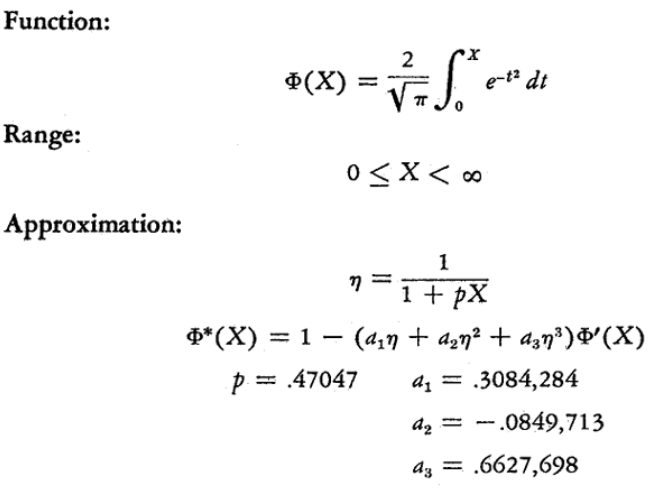

[Reference Link](https://blasingame.engr.tamu.edu/z_zCourse_Archive/P620_18C/P620_zReference/PDF_Txt_Hst_Apr_Cmp_(1955).pdf)

##FIRST

In [ ]:
        SUBROUTINE FIRST

C       THIS SUBROUTINE COMPUTES CHARGE DENSITY RHO(1-MP) AND COLLECTED
C       CURRENT YST, FOR A CYLINDRICAL PROBE, UNDER THE FOLLOWING
C       CONDITIONS
C       LOCUS OF EXTREMA ENTERS FIRST QUADRANT BY CROSSING OMEGA AXIS, AND
C       DOES NOT CROSS ITSELF IN THIS QUADRANT. LINK = 1 OR 2

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD
        GO TO (72,171), MODE
    72  WRITE OUTPUT TAPE 6,73
    73  FORMAT(49H0 WRONG SUBROUTINES BEING USED. EXECUTION DELETED )
        CALL EXIT
    171 N1=LINK
        ECY=EXY/PI
        DO 560 L=1,MP
        LL=L
        RHO(L)=-DYO(BETH,ECY)+TRY(0.0)
        IF(S(L)-SH(1))552,554,554

    552 RHO(L)=RHO(L)+CAL(1,SH(1).SW,2,N2)
        IF(S(L)-SCRIT)551,553,553
    551 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SH(1),3,2)-TRY(BETAW)+Z(L)
        GO TO 560
    553 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SH(1),1,2)-TRY(BETAW)+Z(L)
    1   -TRY(BETAW)+Z(L)
        GO TO 560

    554 IF(S(L)-SW)555,555,556
    555 RHO(L)=RHO(L)-CAL(1,SH(1),S(L),N1,1)+CAL(1,S(L),SW,1,N2)
    1   -TRY(BETAW)+Z(L)
        GO TO 560

    556 RHO(L)=RHO(L)-CAL(1,SH(1),SW,N1,2)+TRY(BETAW)
        IF(L-LK)570,570,542
    542 IF(S(L)-SWA)543,570,570
    570 GO TO (572,573),KBD
    572 IF(L-MP)571,560,560
    571 RHO(L)=RHO(L)+EXPF(-XI(L)/i1.0-XSQ(L)/XSQ(MP))
        GO TO 560
    573 RHO(L)=RHO(L)+1.0
        GO TO 560

    543 RHO(L)=RHO(L)-2.0*TRY(BETAWA)+Z(L)
        IF(S(L)-SCRITA)544,545,545
    544 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SWA,3,N22)
        GO TO 560
    545 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SWA,1,N22)

    560 CONTINUE

        RH=SQRTF(BETH-XI(1))
        YST=2.0*EDY*(RH+COEFT(RH))+CAL(2,SH(1),SW,N1,N2)
        GO TO (575,576),KBD
    575 RW=SQRTF(BETAW)
        YST=YST+(1.0-2.0*EXPF(-BETAW)*SAY*(RW+COEFT(RW)))/X(MP)
    576 RETURN
        END

##SECOND

In [ ]:
        SUBROUTINE SECOND

C       THIS SUBROUTINE COMPUTES THE CHARGE DENSITY RHO(1-MP) AND COLLECTED
C       CURRENT YST, FOR A CYLINDRICAL PROBE, UNDER THE FOLLOWING
C       CONDITIONS
C       LOCUS OF EXTREMA ENTERS FIRST QUADRANT BY CROSSING BETA AXIS, AND
C       DOES NOT CROSS ITSELF IN THIS QUDRANT. LINK = 3 OR 4.

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

##THIRD

In [ ]:
        SUBROUTINE THIRD

C       SUBROUTINE THIRD COMPUTES THE CHARGE DENSITY RHO(1-MP) AND THE
C       COLLECTED CURRENT YST FOR AN ATTRACITNG CYLINDRICAL PROBE (LINK=5)
C       OR A REPELLING CYLINDRICAL PROBE (LINK=6)IN THE CASE WHERE ANY
C       POTENTIAL BARRIERS WHICH MAY EXIST DO NOT AFFECT THE AMOUNT OF
C       COLLECTED CURRENT ( DO NOT AFFECT THE SHAPE OF THE J1 VS E CURVE)

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD, MCD, MZET

##FOURTH

In [ ]:
        SUBROUTINE FOURTH

C       THIS SUBROUTINE COMPUTES CHARGE DENSITY RHO(1-MP) AND COLLECTED
C       CURRENT YST, FOR A CYLINDRICAL PROBE, UNDER THE FOLLOWING
C       CONDITIONS.
C       LOCUS OF EXTREMA CROSSES ITSELF IN THE FIRST QUADRANT OF THE
C       (OMEGA,BETA) PLANE

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

##DYO

In [ ]:
        FUNCTION DYO(AA,ECCY)

C       DYO=(1.0/PI)*INTEGRAL FROM A TO INFINITY OF
C           DBETA*EXPF(-BETA)*ARC SIN(SQRTF(XSQ*(BETA-XI(1))/(BETA-XI)))

        DIMENSION THAMU(30),BIN(30),R(30),AMAR(15),COE(15),VIB(30),FM(31)
        EQUIVALENCE (THAMU(1),AMAR(1)),(THAMU(16),COE(1)),(BIN(1),VIB(1)),
    1       (R(1),FM(1))
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET,HALT

##CDO

In [ ]:
        FUNCTION CDO(XL)

C       THIS FUNCTION SUBPROGRAM IS USED BY FUNCTION DYO AND IS CALLED
C       THROUGH UNIVERSITY OF TORONTO FORTRAN II NUMBERICAL QUADRATURE
C       SUBPROGRAM QUAD

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

        IF(XL)101,101,102
    101 CDO=0.0
        RETURN
    102 FLN=LOGF(XL)
        CDO=-1.0/((FLN+THETA)*SQRTF(FLN**2-AMU**2))
        RETURN
        END

##TRY

In [ ]:
        FUNCTION TRY(AA)

C       TRY=(1.0/PI)*INTEGRAL FROM A TO BH OF
C           DBETA*EXPF(-BETA)*ARC SIN(SQRTF(XSQ*BETA/(XSQ(MP)*(BETA-XI))))

C       WARNING - FUNCTION TRY MAY NOT GIVE CORRECT RESULT IF MAGNITUDE OF
C       XI(LL) IS GREATER THAN 100

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

##CORE

In [ ]:
        FUNCTION CORE(XL)

C       THIS FUNCTION SUBPROGRAM IS USED BY FUNCTION DYO AND IS CALLED
C       THROUGH UNIVERSITY OF TORONTO FORTRAN II NUMBERICAL QUADRATURE
C       SUBPROGRAM QUAD

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

        SANXL=AMU*SINF(XL)
        CORE=EXPF(-SANXL)/(SANXL+THETA)
        RETURN
        END